In [2]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/DBDA_Official10/Machine_Learning/main/Assignment/Datasets/energy_production.csv',sep=';')

In [4]:
df.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [5]:
np.corrcoef(df['temperature'],df['exhaust_vacuum'])

array([[1.        , 0.84410673],
       [0.84410673, 1.        ]])

In [6]:
x = df.drop(['energy_production','amb_pressure' , 'r_humidity'],axis=1)
df.drop(['temperature','exhaust_vacuum'],axis=1,inplace=True)

from sklearn.decomposition import PCA

# create an object of PCA
pca = PCA(n_components=1)

# Here it will transform all columns in x into single one
x_new = pca.fit_transform(x)

# convert it to a new dataframe
x_new = pd.DataFrame(x_new, columns=['PC1'])

# You need to add this column to original DataFrame
df_new = pd.concat([df,x_new])

df_new

,amb_pressure,r_humidity,energy_production,PC1
0,1017.01,60.10,481.30,NaN
1,1019.72,94.67,465.36,NaN
2,1024.42,81.69,465.48,NaN
3,1017.89,79.08,467.05,NaN
4,1023.78,75.00,463.58,NaN
...,...,...,...,...
9563,NaN,NaN,NaN,-5.273549
9564,NaN,NaN,NaN,12.124009
9565,NaN,NaN,NaN,6.807978
9566,NaN,NaN,NaN,11.931113


In [7]:
x_new

,PC1
0,-18.632121
1,-14.142823
2,-10.863094
3,-2.811037
4,-6.244829
...,...
9563,-5.273549
9564,12.124009
9565,6.807978
9566,11.931113


In [8]:
df

,amb_pressure,r_humidity,energy_production
0,1017.01,60.10,481.30
1,1019.72,94.67,465.36
2,1024.42,81.69,465.48
3,1017.89,79.08,467.05
4,1023.78,75.00,463.58
...,...,...,...
9563,1005.53,81.82,457.32
9564,1015.42,52.80,446.92
9565,1005.19,56.24,429.34
9566,1020.61,80.29,421.57


In [9]:
df_new = pd.concat([df,x_new],axis=1)
df_new

,amb_pressure,r_humidity,energy_production,PC1
0,1017.01,60.10,481.30,-18.632121
1,1019.72,94.67,465.36,-14.142823
2,1024.42,81.69,465.48,-10.863094
3,1017.89,79.08,467.05,-2.811037
4,1023.78,75.00,463.58,-6.244829
...,...,...,...,...
9563,1005.53,81.82,457.32,-5.273549
9564,1015.42,52.80,446.92,12.124009
9565,1005.19,56.24,429.34,6.807978
9566,1020.61,80.29,421.57,11.931113


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amb_pressure       9568 non-null   float64
 1   r_humidity         9568 non-null   float64
 2   energy_production  9568 non-null   float64
 3   PC1                9568 non-null   float64
dtypes: float64(4)
memory usage: 299.1 KB


In [11]:
x1 = df_new.drop(['energy_production'], axis=1)
y1 = df_new['energy_production']

In [12]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x1,y1,train_size = 0.8 , random_state= 123456)

In [13]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score 

In [15]:
y_pred = model.predict(x_test)
MAE = mean_absolute_error(y_test , y_pred)
MSE = mean_squared_error(y_test , y_pred)
RMSE = root_mean_squared_error(y_test , y_pred)

R2 = r2_score(y_test , y_pred)

print(f"Mae is {MAE} , Mse is {MSE} , Rmse is {RMSE} , R2 is {R2}")

Mae is 5.141650318793607 , Mse is 42.31715924848749 , Rmse is 6.505164044702292 , R2 is 0.8553312753016079


In [16]:
y_pred = model.predict(x_train)
MAE = mean_absolute_error(y_train , y_pred)
MSE = mean_squared_error(y_train , y_pred)
RMSE = root_mean_squared_error(y_train , y_pred)

R2 = r2_score(y_train , y_pred)

print(f"Mae is {MAE} , Mse is {MSE} , Rmse is {RMSE} , R2 is {R2}")

Mae is 5.077939489226371 , Mse is 42.25627903021484 , Rmse is 6.5004829843800715 , R2 is 0.854743561536379


ValueError: x and y must have same first dimension, but have shapes (7654,) and (1914, 1)

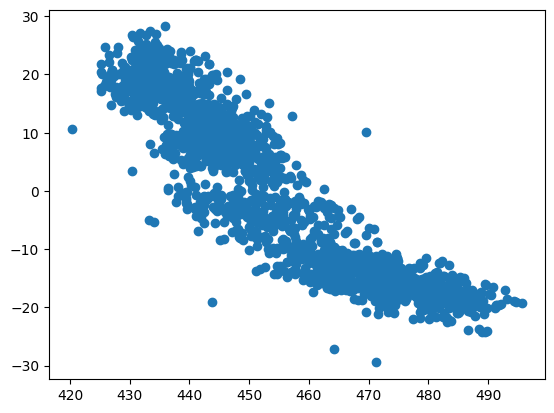

In [18]:
plt.scatter(y_test, x_test.drop(['amb_pressure' , 'r_humidity' ], axis=1))
plt.plot(y_pred , x_test.drop(['amb_pressure' , 'r_humidity' ], axis=1), color = "red")

In [ ]:
df_new

In [ ]:

xyz = list([1000,80,10])
model.predict([xyz])